# Python for Data Science Quiz

## This quiz is to test your understanding on the concepts learnt in class during the 
## Python for Data Science Course. 
## Background of the data - The dataset to be used for the quiz pertains to the 
## number of hospitalisations under the scheme Ayushman Bharat - Pradhan 
## Mantri Jan Arogya Yojana (AB-PMJAY), this data is as on 19 June, 2019.
## The data contains number of cases of hospitalisation in public and private hospitalisations 
## state/ UT wise and on an all India level.
## PMJAY is a scheme which provides health cover of Rs. 5 Lakhs per family per year, for 
## secondary and tertiary care hospitalization across public and private empaneled hospitals
## in India. State/UT contains the list of states and union territories, Public column contains
## hospitalisations in public hospitals and Private column contains list of hospitalisations in 
## private hospitals. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(color_codes=True)
%matplotlib inline

## Question 1: Import the dataset.

In [2]:
df=pd.read_csv('4.hospitalisations.csv')

## Question 2: How many rows and columns does the data set have?

In [3]:
print('Rows:',df.shape[0],'\nColumns:',df.shape[1])

Rows: 32 
Columns: 3


## Question 3: Does the data set have missing values? If yes, how many?

In [7]:
df.isnull().sum()

State/UT    0
Private     2
Public      2
dtype: int64

## Question 4: Drop the NA values.

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

State/UT    0
Private     0
Public      0
dtype: int64

## Question 5: Create a new column Total which contains a sum of private and public
## hospitalisations. So the column Total should be a summation of the two columns
## Public and Private.

In [11]:
df['Total']=df['Public']+df['Private']

In [12]:
df.head()

,State/UT,Private,Public,Total
0,Andaman and Nicobar Islands,1.0,21.0,22.0
1,Andhra Pradesh,97863.0,34385.0,132248.0
2,Arunachal Pradesh,5.0,630.0,635.0
3,Assam,14350.0,33553.0,47903.0
4,Bihar,11747.0,34814.0,46561.0


## Question 6: Which State or UT is the unhealthiest? (i.e. maximum number of hospitalisations) 
## HINT : Do not include Grand Total

In [35]:
df.sort_values('Total',ascending=False).head()

,State/UT,Private,Public,Total
31,Grand Total,1697117.0,1238196.0,2935313.0
6,Chhattisgarh,411814.0,142123.0,553937.0
16,Kerala,131557.0,391079.0,522636.0
10,Gujarat,379379.0,94845.0,474224.0
26,Tamil Nadu,120473.0,116701.0,237174.0


In [46]:
unhealthiest=df.drop(31,axis=0)
unhealthiest.sort_values('Total',ascending=False)['State/UT']

6                    Chhattisgarh
16                         Kerala
10                        Gujarat
26                     Tamil Nadu
15                      Karnataka
14                      Jharkhand
19                    Maharashtra
1                  Andhra Pradesh
28                  Uttar Pradesh
18                 Madhya Pradesh
29                    Uttarakhand
3                           Assam
4                           Bihar
11                        Haryana
12               Himachal Pradesh
13              Jammu and Kashmir
30                    West Bengal
27                        Tripura
21                      Meghalaya
22                        Mizoram
7          Dadra and Nagar Haveli
8                   Daman and Diu
20                        Manipur
9                             Goa
23                       Nagaland
5                      Chandigarh
2               Arunachal Pradesh
25                         Sikkim
0     Andaman and Nicobar Islands
Name: State/UT

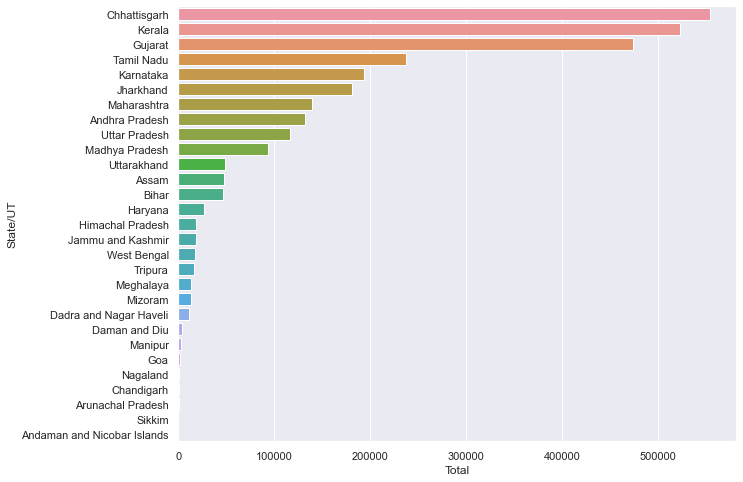

In [48]:
plt.figure(figsize=(10,8))
sns.barplot(y=unhealthiest['State/UT'],x=unhealthiest['Total'],order=unhealthiest.sort_values('Total',ascending=False)['State/UT'])
plt.show()

## Question 7: Chhattisgarh accounts for roughly 18% share in the total hospitalisations in India (assuming these are the only states/UTs in India). True for False?

In [49]:
df.head()

,State/UT,Private,Public,Total
0,Andaman and Nicobar Islands,1.0,21.0,22.0
1,Andhra Pradesh,97863.0,34385.0,132248.0
2,Arunachal Pradesh,5.0,630.0,635.0
3,Assam,14350.0,33553.0,47903.0
4,Bihar,11747.0,34814.0,46561.0


In [50]:
df['% of hospitalization']=df['Total']/df['Total'].max()*100

In [54]:
df[df['State/UT']=='Chhattisgarh']

,State/UT,Private,Public,Total,% of hospitalization
6,Chhattisgarh,411814.0,142123.0,553937.0,18.87148


## Question 8: In Dadra and Nagar Haveli, which type of hospitals do people prefer?

In [55]:
df[df['State/UT']=='Dadra and Nagar Haveli']

,State/UT,Private,Public,Total,% of hospitalization
7,Dadra and Nagar Haveli,782.0,10940.0,11722.0,0.399344


## Question 9: Plot the total hospitalisations in a plot of your choice and comment on the 
## healthiest State/UT. (Assuming that the only parameter for Healthiest is the number of 
## hospitalisations only)

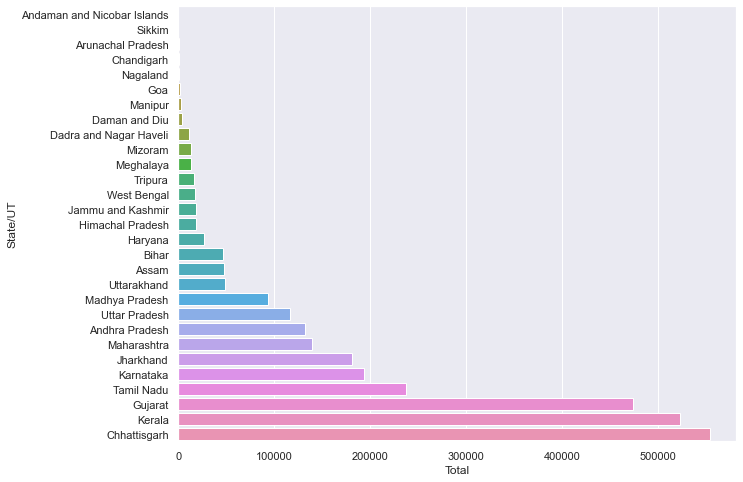

In [56]:
plt.figure(figsize=(10,8))
sns.barplot(y=unhealthiest['State/UT'],x=unhealthiest['Total'],order=unhealthiest.sort_values('Total',ascending=True)['State/UT'])
plt.show()

## Question 10: Public Hospitalisations are more on an all India level as compared to state/UT level. True or False? 
## HINT: Calculate the percentage of public hospitalisation (public/total), then find out the average percentage of all states using the mean() function. Compare this average percentage (state) with the grand total (all India) percentage and comment.

In [71]:
round(df['Public %'].mean(),2)*100

59.0

In [74]:
df['Public %']=df['Public']/df['Total']
print('Public hospitalization on State/UT level is',round(df['Public %'].mean(),2)*100,'%')

Public hospitalization on State/UT level is 59.0 %


In [62]:
print('Public hospitalization on all india level is',round(df['Public'].sum()/df['Total'].max(),2)*100,'%')

Public hospitalization on all india level is 84.0 %


## Question 11: Which States/UTs have more than 50000 hospitalisations?

In [79]:
df[df['Total']>=50000]['State/UT']

1     Andhra Pradesh
6       Chhattisgarh
10           Gujarat
14         Jharkhand
15         Karnataka
16            Kerala
18    Madhya Pradesh
19       Maharashtra
26        Tamil Nadu
28     Uttar Pradesh
31       Grand Total
Name: State/UT, dtype: object

## Question 12: Which state reported exactly 1 case of private hospitalisation?

In [80]:
df[df['Private']==1]

,State/UT,Private,Public,Total,% of hospitalization,Public %
0,Andaman and Nicobar Islands,1.0,21.0,22.0,0.000749,0.954545


## Question 13: Which State/UT has maximum number of people admitted to public hospitals?

In [81]:
maxpublic=df.copy()

In [82]:
maxpublic.drop(31,axis=0,inplace=True)

In [85]:
maxpublic.sort_values('Public',ascending=False).head()

,State/UT,Private,Public,Total,% of hospitalization,Public %
16,Kerala,131557.0,391079.0,522636.0,17.805120,0.748282
6,Chhattisgarh,411814.0,142123.0,553937.0,18.871480,0.256569
15,Karnataka,65502.0,128640.0,194142.0,6.614014,0.662608
26,Tamil Nadu,120473.0,116701.0,237174.0,8.080024,0.492048
10,Gujarat,379379.0,94845.0,474224.0,16.155824,0.200000


/opt/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Public', ylabel='State/UT'>

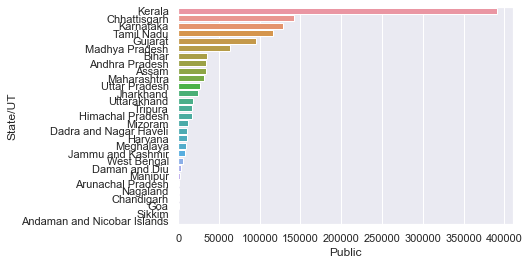

In [88]:
sns.barplot(maxpublic['Public'],maxpublic['State/UT'],order=maxpublic.sort_values('Public',ascending=False)['State/UT'])

## Question 14: Which state among Tripura and Gujarat witnessed more hospitalisations? 
## (in absolute numbers)

In [90]:
df[df['State/UT']=='Tripura']

,State/UT,Private,Public,Total,% of hospitalization,Public %
27,Tripura,90.0,16702.0,16792.0,0.572068,0.99464


In [91]:
df[df['State/UT']=='Gujarat']

,State/UT,Private,Public,Total,% of hospitalization,Public %
10,Gujarat,379379.0,94845.0,474224.0,16.155824,0.2


## Question 15: Are there any extreme values/ outliers present in this data set? Do these
## values impact the analysis?

In [101]:
new=df[df.dtypes[]

State/UT                 object
Private                 float64
Public                  float64
Total                   float64
% of hospitalization    float64
Public %                float64
dtype: object

In [100]:
data_plot=df[df.dtypes[df.dtypes!='object'].index]
data_plot

,Private,Public,Total,% of hospitalization,Public %
0,1.0,21.0,22.0,0.000749,0.954545
1,97863.0,34385.0,132248.0,4.505414,0.260004
2,5.0,630.0,635.0,0.021633,0.992126
3,14350.0,33553.0,47903.0,1.631955,0.700436
4,11747.0,34814.0,46561.0,1.586236,0.747707
5,302.0,509.0,811.0,0.027629,0.627620
6,411814.0,142123.0,553937.0,18.871480,0.256569
7,782.0,10940.0,11722.0,0.399344,0.933288
8,984.0,3343.0,4327.0,0.147412,0.772591
9,1033.0,382.0,1415.0,0.048206,0.269965


<AxesSubplot:>

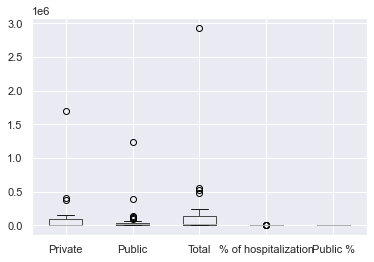

In [94]:
df.boxplot()

THE END!